# Анализ рынка заведений общественного питания города Москвы

Исследование рынка общественного питания на основе открытых данных, подготовка презентации для инвесторов

# Подготовительные действия

In [2]:
# подключаем необходимые модули
from IPython.display import display
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from io import BytesIO
import requests
import plotly.express as px
from plotly import graph_objects as go

# отключаем предупреждения фильтрации
import warnings
warnings.filterwarnings("ignore")

from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-подготовка-данных" data-toc-modified-id="Загрузка-и-подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Приведение-данных-к-нужным-типам" data-toc-modified-id="Приведение-данных-к-нужным-типам-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Приведение данных к нужным типам</a></span></li><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Исследуем-соотношение-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Исследуем-соотношение-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследуем соотношение видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Исследуем-соотношение-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Исследуем-соотношение-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Исследуем соотношение сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Для-какого-вида-объекта-общественного-питания-характерно-сетевое-распространение" data-toc-modified-id="Для-какого-вида-объекта-общественного-питания-характерно-сетевое-распространение-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Для какого вида объекта общественного питания характерно сетевое распространение</a></span></li><li><span><a href="#Что-характерно-для-сетевых-заведений:-много-заведений-с-небольшим-числом-посадочных-мест-в-каждом-или-мало-заведений-с-большим-количеством-посадочных-мест" data-toc-modified-id="Что-характерно-для-сетевых-заведений:-много-заведений-с-небольшим-числом-посадочных-мест-в-каждом-или-мало-заведений-с-большим-количеством-посадочных-мест-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест</a></span></li><li><span><a href="#Для-каждого-вида-объекта-общественного-питания-опишите-среднее-количество-посадочных-мест.-Какой-вид-предоставляет-в-среднем-самое-большое-количество-посадочных-мест?-Постройте-графики" data-toc-modified-id="Для-каждого-вида-объекта-общественного-питания-опишите-среднее-количество-посадочных-мест.-Какой-вид-предоставляет-в-среднем-самое-большое-количество-посадочных-мест?-Постройте-графики-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики</a></span></li><li><span><a href="#Выделите-в-отдельный-столбец-информацию-об-улице-из-столбца-address" data-toc-modified-id="Выделите-в-отдельный-столбец-информацию-об-улице-из-столбца-address-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Выделите в отдельный столбец информацию об улице из столбца <code>address</code></a></span></li><li><span><a href="#Постройте-график-топ-10-улиц-по-количеству-объектов-общественного-питания.-Воспользуйтесь-внешней-информацией-и-ответьте-на-вопрос-—-в-каких-районах-Москвы-находятся-эти-улицы?" data-toc-modified-id="Постройте-график-топ-10-улиц-по-количеству-объектов-общественного-питания.-Воспользуйтесь-внешней-информацией-и-ответьте-на-вопрос-—-в-каких-районах-Москвы-находятся-эти-улицы?-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?</a></span></li><li><span><a href="#Найдите-число-улиц-с-одним-объектом-общественного-питания.-Воспользуйтесь-внешней-информацией-и-ответьте-на-вопрос-—-в-каких-районах-Москвы-находятся-эти-улицы?" data-toc-modified-id="Найдите-число-улиц-с-одним-объектом-общественного-питания.-Воспользуйтесь-внешней-информацией-и-ответьте-на-вопрос-—-в-каких-районах-Москвы-находятся-эти-улицы?-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?</a></span></li><li><span><a href="#Посмотрите-на-распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания.-Какие-закономерности-можно-выявить?" data-toc-modified-id="Посмотрите-на-распределение-количества-посадочных-мест-для-улиц-с-большим-количеством-объектов-общественного-питания.-Какие-закономерности-можно-выявить?-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Презентация" data-toc-modified-id="Презентация-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Презентация</a></span></li></ul></div>

## Загрузка и подготовка данных

In [3]:
# загружаем данные
data = pd.read_csv('datasets/rest_data.csv')

# выводим информацию
display(data.info())

# выводим информацию по числовым данным
display(data.describe().T)

# посмотрим на первые 5 записей
display(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

,count,mean,std,min,25%,50%,75%,max
id,15366.0,119720.066901,73036.130732,838.0,28524.0,144974.5,184262.25,223439.0
number,15366.0,59.547182,74.736833,0.0,12.0,40.0,80.00,1700.0


,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


По результатам краткого знакомства с датасетом можно сказать следующее:

- В данных нет пропусков
- Столбцы с числовыми данными имеют избыточные типы данных
- Данные в столбце `chain` необходимо преобразовать в булевы, вместо `да` записать True, вместо `нет` - False. Это упростит работу и сократит потребление памяти
- Необходимо проверить данные на наличие полных дубликатов и дубликатов категорий в столбцах `chain` и `object_type`, записанных в разном регистре  
- Название столбца `number` не отражает смысл хранящейся в нём информации. Для удобства работы заменим его на смыслово более подходящее `capacity`
- Название столбца `chain` не отражает смысл хранящейся в нём информации. Для удобства работы заменим его на более корректное `network`

### Проверка на дубликаты

In [4]:
# посмотрим на уникальные значения столбцов, хранящих категориальные данные
for i in ['chain', 'object_type']:
    print(data[i].unique())

['нет' 'да']
['кафе' 'столовая' 'закусочная' 'предприятие быстрого обслуживания'
 'ресторан' 'кафетерий' 'буфет' 'бар' 'магазин (отдел кулинарии)']


In [5]:
# посчитаем количество полных дубликатов
print('В датасете найдено {} полных дубликатов'.format(data.duplicated().sum()))

В датасете найдено 0 полных дубликатов


Полных дубликатов в датасете у нас нет, категории не задвоены, поэтому можно приступать к приведению данных к нужным типам

Проверим дубликаты по связке "название + вид заведения + адрес + вместимость". В контексте наших данных это в целом тоже можно считать полным дубликатом

In [6]:
# посчитаем количество таких записей
print('В датасете найдено {} дубликатов по связке "название + вид заведения + адрес + вместимость"'.format(
    data.duplicated(subset=['object_name', 'object_type', 'address', 'number']).sum()
))

В датасете найдено 82 дубликатов по связке "название + вид заведения + адрес + вместимость"


82 записи это 0,5% от всего датасета, можно смело избавиться от этих записей

In [7]:
data.drop_duplicates(subset=['object_name', 'object_type', 'address', 'number'], inplace=True)

display(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
id             15284 non-null int64
object_name    15284 non-null object
chain          15284 non-null object
object_type    15284 non-null object
address        15284 non-null object
number         15284 non-null int64
dtypes: int64(2), object(4)
memory usage: 835.8+ KB


None

### Приведение данных к нужным типам

In [8]:
# проверим потребление памяти данными
display(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
id             15284 non-null int64
object_name    15284 non-null object
chain          15284 non-null object
object_type    15284 non-null object
address        15284 non-null object
number         15284 non-null int64
dtypes: int64(2), object(4)
memory usage: 9.2 MB


None

In [9]:
# переведём "да/нет" в логические значения
data['chain'] = data['chain'].apply(lambda x: True if x == 'да' else False).astype('bool')

In [10]:
# приведём числовые данные к рациональным типам
for i in ['id', 'number']:
    data[i] = pd.to_numeric(data[i], downcast='unsigned')

In [11]:
# проверим, что всё получилось и посмотрим на потребление памяти после преобразований
display(data.info(memory_usage='deep'))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15284 entries, 0 to 15365
Data columns (total 6 columns):
id             15284 non-null uint32
object_name    15284 non-null object
chain          15284 non-null bool
object_type    15284 non-null object
address        15284 non-null object
number         15284 non-null uint16
dtypes: bool(1), object(3), uint16(1), uint32(1)
memory usage: 7.7 MB


None

In [12]:
# переименуем столбцы
data = data.rename(columns={'number':'capacity', 'chain':'network'})

In [13]:
data['object_name'] = data['object_name'].str.lower()

data['object_name'] = data['object_name'].apply(str.strip)

In [14]:
# посмотрим на первые 5 записей обновлённого датасета
display(data.head())

,id,object_name,network,object_type,address,capacity
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


### Вывод по разделу

В результате подготовки данных мы можем сообщить следующее:
 - Данные приведены к нужным типам
 - Пропусков в данных нет
 - В данных были обнаружены 82 дубликата. Так как это составляет всего 0,5% от общего количества записей, мы их удалили
 - Переименованы два столбца для приведения в смысловое соответствие содержащимся данным
 - Потребление памяти сократилось на 16,3% (с 9,2 Мб до 7,7 Мб)
 
С уверенностью можно сказать, что данные готовы к анализу.

## Анализ данных

### Исследуем соотношение видов объектов общественного питания по количеству

In [15]:
# сохраним данные о количестве заведений каждого вида и отсортируем по убыванию
qty_by_type = data.groupby('object_type').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()

# выведем данные на экран
display(qty_by_type)

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1898
4,бар,855
5,буфет,577
6,кафетерий,395
7,закусочная,349
8,магазин (отдел кулинарии),273


Для иллюстрации распределения построим столбчатую диаграмму

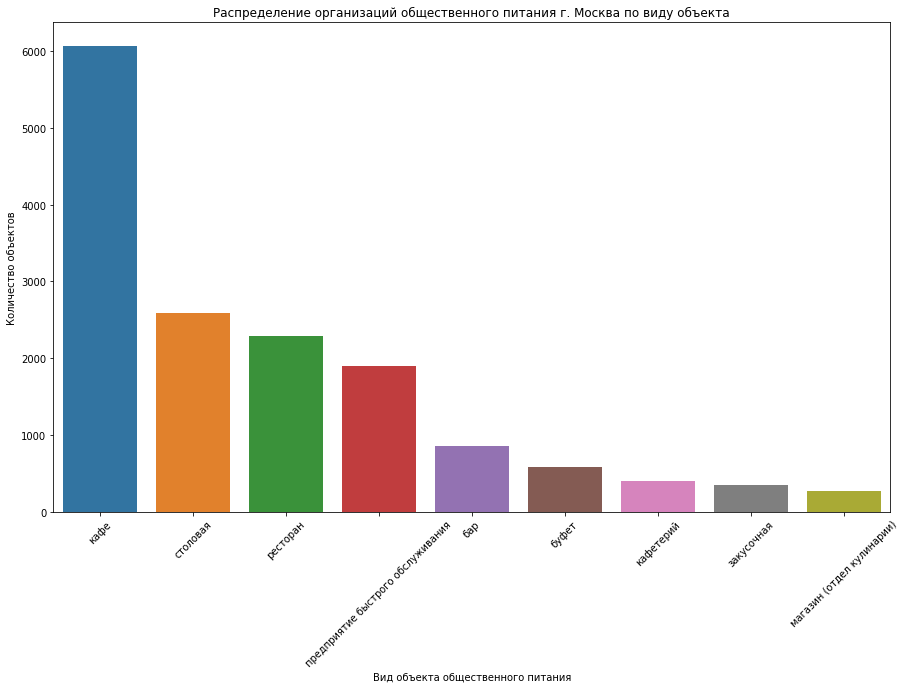

In [16]:
# выбираем палитру
#sns.set_palette('bright')

# строим график
plt.figure(figsize=(15,9))
plt.xticks(rotation=45)

plots = sns.barplot(
    x='object_type',
    y='id',
    data=qty_by_type
)

# подписываем график и оси
plots.set_title('Распределение организаций общественного питания г. Москва по виду объекта')
plots.set_xlabel('Вид объекта общественного питания')
plots.set_ylabel('Количество объектов')

plt.show()

Также проиллюстрируем распределение круговой диаграммой, чтобы были понятны относительные доли количества заведений каждого типа

In [46]:
# строим график
fig = go.Figure(data=[go.Pie(labels=qty_by_type['object_type'], values=qty_by_type['id'])])

# задаём название графика
fig.update_layout(
    title="Распределение организаций общественного питания г. Москва по виду объекта"
)

fig.show()

На графиках видно, что есть ярко выраженная четвёрка лидеров среди типов заведений: 1-е место занимает кафе (39,7% всех заведений), 2-е место у столовых (16,8%), 3-е место рестораны (14,9%) и замыкают четвёрку предприятия быстрого обслуживания (12,5%).

### Исследуем соотношение сетевых и несетевых заведений по количеству

In [18]:
# сохраним данные о количестве сетевых/не сетевых заведений и отсортируем по убыванию
qty_by_net = data.groupby('network').agg({'id':'count'}).sort_values(by='id', ascending=False).reset_index()

# выведем на экран

display(qty_by_net)

,network,id
0,False,12320
1,True,2964


In [19]:
# строим график
fig = go.Figure(data=[go.Pie(
    labels=['Не сетевое', 'Сетевое'],
    values=qty_by_net['id']
)])

# задаём название графика
fig.update_layout(
    title='Распределение заведений общественного питания г. Москва по типу распространения'
)
fig.show()

Как мы видим, большая часть (80,7%) заведений общественного питания в г. Москва - не сетевые

### Для какого вида объекта общественного питания характерно сетевое распространение

In [20]:
# создаём пустой датафрейм, куда будем складывать сведения
network_points = pd.DataFrame()

# для всех видов объектов посчитаем количество сетевых/не сетевых заведений и их доли
for i in data['object_type'].unique():
    _data = data[data['object_type'] == i].groupby(['object_type', 'network']).agg({'id':'count'})
    _data['share'] = round(_data['id'] / _data['id'].sum() * 100, 2)
    network_points = pd.concat([network_points, _data])

# выведем на экран
display(network_points)

id  share
object_type                       network             
кафе                              False    4675  77.01
                                  True     1396  22.99
столовая                          False    2581  99.88
                                  True        3   0.12
закусочная                        False     293  83.95
                                  True       56  16.05
предприятие быстрого обслуживания False    1110  58.48
                                  True      788  41.52
ресторан                          False    1739  76.21
                                  True      543  23.79
кафетерий                         False     343  86.84
                                  True       52  13.16
буфет                             False     566  98.09
                                  True       11   1.91
бар                               False     818  95.67
                                  True       37   4.33
магазин (отдел кулинарии)         False     195  71.43
                                  True       78  28.57

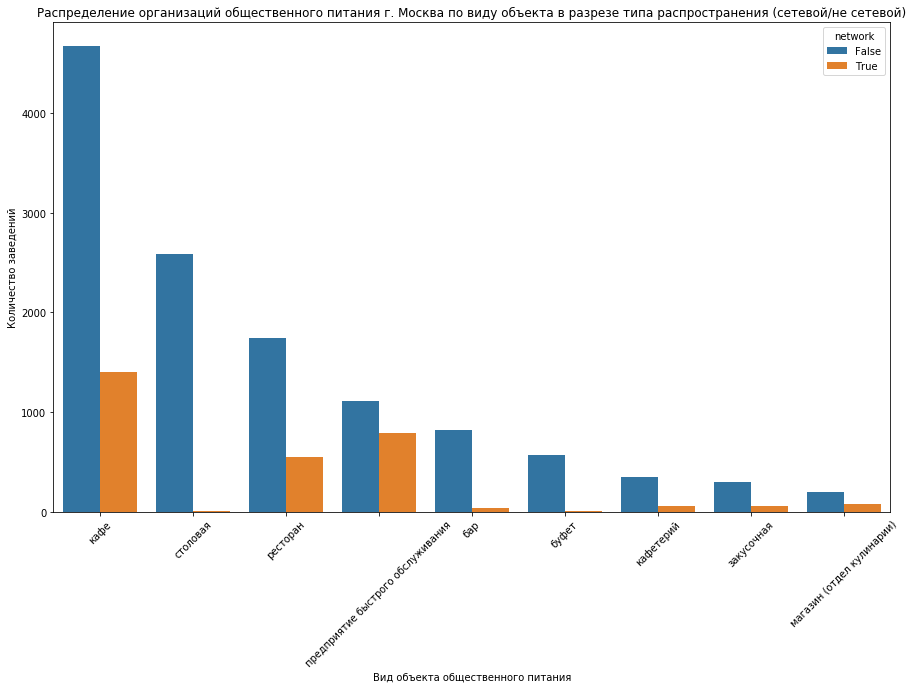

In [21]:
# задаём параметры графика
plt.figure(figsize=(15,9))
plt.xticks(rotation=45)

# строим график
plots = sns.barplot(
    x='object_type',
    y='id',
    hue='network',
    data=network_points.sort_values(by='id', ascending=False).reset_index(),
    ci = None
)

# подписываем график и оси
plots.set_title('Распределение организаций общественного питания г. Москва по виду объекта в разрезе типа распространения (сетевой/не сетевой)')
plots.set_xlabel('Вид объекта общественного питания')
plots.set_ylabel('Количество заведений')

plt.show()

Как видно из графика, почти для всех видов объектов общественного питания подтверждается вывод, сделанный в предыдущем пункте - количество сетевых заведений мало в сравнении с не сетевыми. С учётом общего соотношения сетевых/не сетевых объектов, видами объектов, для которых характерно сетевое распространение, можно считать все виды, для которых доля сетевых заведения составляет не менее 19,32% (общая доля сетевых заведений по всей Москве). Таковыми видами являются:

- Предприятие быстрого обслуживания (41,13%)
- Магазин (отдел кулинарии) (28,57%)
- Ресторан (23,81%)
- Кафе (22,89%)

### Что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест

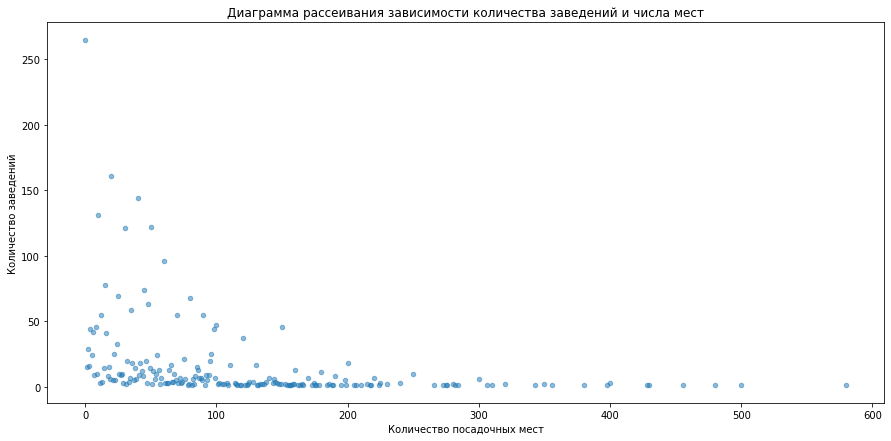

In [22]:
# создаём сводную таблицу по сетевым заведениям с количеством заведений и количеством мест
network_pivot = data.query('network == True').pivot_table(
    index='capacity',
    aggfunc={'id':'count'}
).reset_index().sort_values(by='id', ascending=False)

# переименовываем столбцы
network_pivot.columns = ['number', 'count']

# строим диаграмму рассеивания
network_pivot.plot(x='number', y='count', 
            kind ='scatter', alpha = 0.5, figsize=(15,7), title='Диаграмма рассеивания зависимости количества заведений и числа мест')
plt.xlabel('Количество посадочных мест')
plt.ylabel('Количество заведений')
plt.show()

Исходя из полученного графика можно уверенно сказать, что сетевые заведения предпочитают иметь много заведений с малым количеством мест. Условно можно выделить границу около 100 посадочных мест, после которой количество заведений резко снижается.

### Для каждого вида объекта общественного питания опишите среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест? Постройте графики

In [23]:
# считаем среднюю вместимость заведений для всех видов объектов. бонусом поделим их по типу бизнеса - сетевое/не сетевое
mean_capacity_by_type = data.groupby(['object_type', 'network']).agg({'capacity':'mean'})

# округлим посадочные места
mean_capacity_by_type['capacity'] = np.ceil(mean_capacity_by_type['capacity'])

# выведем на экран
display(mean_capacity_by_type)

capacity
object_type                       network          
бар                               False        44.0
                                  True         54.0
буфет                             False        53.0
                                  True         13.0
закусочная                        False         7.0
                                  True         15.0
кафе                              False        38.0
                                  True         48.0
кафетерий                         False         9.0
                                  True         13.0
магазин (отдел кулинарии)         False         5.0
                                  True          9.0
предприятие быстрого обслуживания False         7.0
                                  True         41.0
ресторан                          False        96.0
                                  True        101.0
столовая                          False       131.0
                                  True        113.0

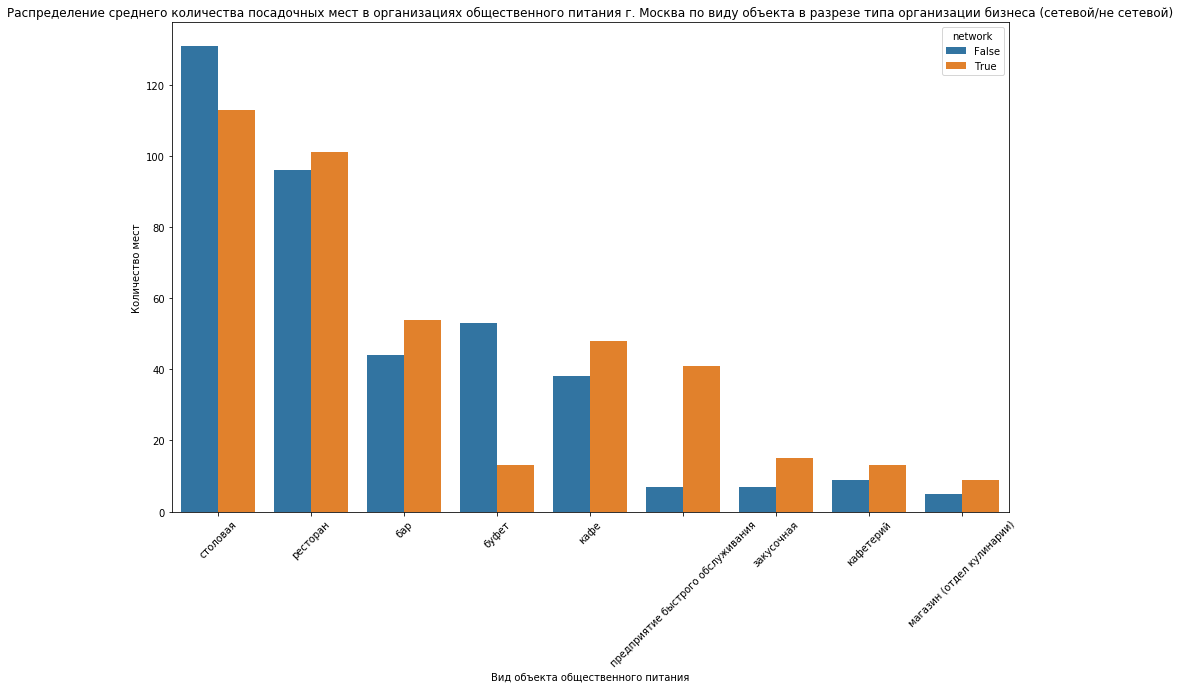

In [24]:
# задаём параметры графика
plt.figure(figsize=(15,9))
plt.xticks(rotation=45)

# строим график
plots = sns.barplot(
    x='object_type',
    y='capacity',
    hue='network',
    data=mean_capacity_by_type.reset_index().sort_values(
        by='capacity',
        ascending=False
    ),
    ci = None
)

# подписываем график и оси
plots.set_title('Распределение среднего количества посадочных мест в организациях общественного питания г. Москва по виду объекта в разрезе типа организации бизнеса (сетевой/не сетевой)')
plots.set_xlabel('Вид объекта общественного питания')
plots.set_ylabel('Количество мест')

plt.show()

Как видно из графика, самое большое количество посадочных мест в среднем представляют столовые. Также можно заметить следующее - виды заведений, для которых характерно сетевое распространение - предприятия быстрого обслуживания, кулинарии, рестораны, кафе, и примкнувшие к ним бары, закусочные и кафетерии, представляют в среднем больше посадочных мест, чем их не сетевые собратья. Очень интересную картину представляют буфеты и предприятия быстрого обслуживания - в первых среднее число посадочных мест в не сетевых заведених в 4 раза больше, чем в сетевых, а во вторых наоборот - сетевые заведения в среднем представляют посадочных мест в 5,86 раза больше.

### Выделите в отдельный столбец информацию об улице из столбца `address`

С учётом непростой Московской топонимики, задача не слишком простая.

Сначала мы выпишем все ключевые слова, которые обозначают адресную принадлежность - они сохранены в словаре `street_desc`. Потом мы разбиваем, строку с адресом на отдельные составляющие (сплит по запятой) и в цикле для каждой из таких составляющих смотрим, есть ли в ней вхождение одного из слов, характеризующих адресную принадлежность. Если есть, то возвращаем этот элемент адресной строки как улицу.
    
Если же таких вхождений мы не нашли совсем, то записываем для них ключевое слово `NO_STREET`, чтобы их как-то отделить

In [25]:
# словарь ключевых слов, которые обозначают адресную принадлежность
street_desc = {
    'улица',
    'шоссе',
    'проезд',
    'переулок',
    'проспект',
    'набережная',
    'бульвар',
    'площадь',
    'тупик',
    'километр',
    'квартал',
    'просек',
    'аллея',
    'линия'
}

# напишем функцию по извлечению адреса
def extract_street(address):
    global street_desc
    street = ''
    addr_split = address.split(',')
    for i in addr_split:
        common_words = set(i.strip().split(' ')) & street_desc
        if len(common_words) > 0:
            street = i.strip()
            break
    if len(street) == 0:
        street = 'NO_STREET'
    return street

# применяем функцию к датасету
data['street'] = data['address'].apply(extract_street)

In [26]:
# взглянем на первые 5 строк обновлённого датафрейма
display(data.head())

,id,object_name,network,object_type,address,capacity,street
0,151635,сметана,False,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,False,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,False,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,True,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,False,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Посмотрим на те объекты, которые не имеют адреса в общеупотребимом формате:

In [27]:
display(data.query('street == "NO_STREET"'))

,id,object_name,network,object_type,address,capacity,street
1405,20199,это,False,кафе,"город Москва, город Зеленоград, корпус 401",35,NO_STREET
1406,68113,френдс,False,кафе,"город Москва, город Зеленоград, корпус 435",34,NO_STREET
1407,20105,кафе «граф монте-кристо»,False,кафе,"город Москва, город Зеленоград, корпус 436",40,NO_STREET
1408,22982,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",49,NO_STREET
1409,151267,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",45,NO_STREET
...,...,...,...,...,...,...,...
14998,216926,кафе «сахли»,False,закусочная,"город Москва, поселение Десеновское, деревня В...",10,NO_STREET
15015,208239,газпромнефть,False,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,NO_STREET
15137,209920,дюшес,True,ресторан,"город Москва, город Зеленоград, Проезд № 4806,...",100,NO_STREET
15184,220587,пицца паоло,True,кафетерий,"город Москва, город Зеленоград, корпус 1627",0,NO_STREET


Итак, у нас 343 объекта, которые не имеют уличной принадлежности в её общеупотребимом значении. Если посмотреть на эти адреса более пристально, то становится понятно, что они принадлежат либо территориальным единицам с экспериментальной адресацией (Зеленоград, Северное Чертаново) либо очень мелким периферийным поселениям. Доля таких записей составляет всего 2,24% от общего числа, поэтому мы оставим их как есть.

### Постройте график топ-10 улиц по количеству объектов общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [28]:
# записываем топ-10 улиц по количеству объектов и сортируем их по убыванию количества объектов
streets_top_10 = data.groupby('street').agg({'id':'count'}).reset_index().sort_values(by='id', ascending=False).head(10)

# выведем на экран
display(streets_top_10)

,street,id
252,NO_STREET,343
1450,проспект Мира,204
1039,Профсоюзная улица,182
712,Ленинградский проспект,172
1023,Пресненская набережная,167
425,Варшавское шоссе,165
715,Ленинский проспект,148
1446,проспект Вернадского,128
702,Кутузовский проспект,114
625,Каширское шоссе,111


In [29]:
# записываем топ-10 улиц по количеству объектов и сортируем их по убыванию количества объектов (уже без объектов, не имеющих
# нормальных улиц)
streets_top_10 = data.query('street != "NO_STREET"').groupby('street').agg({'id':'count'}).reset_index().sort_values(
    by='id',
    ascending=False
).head(10)

# выведем на экран
display(streets_top_10)

,street,id
1449,проспект Мира,204
1038,Профсоюзная улица,182
711,Ленинградский проспект,172
1022,Пресненская набережная,167
424,Варшавское шоссе,165
714,Ленинский проспект,148
1445,проспект Вернадского,128
701,Кутузовский проспект,114
624,Каширское шоссе,111
631,Кировоградская улица,108


Данные получены, пора строить график

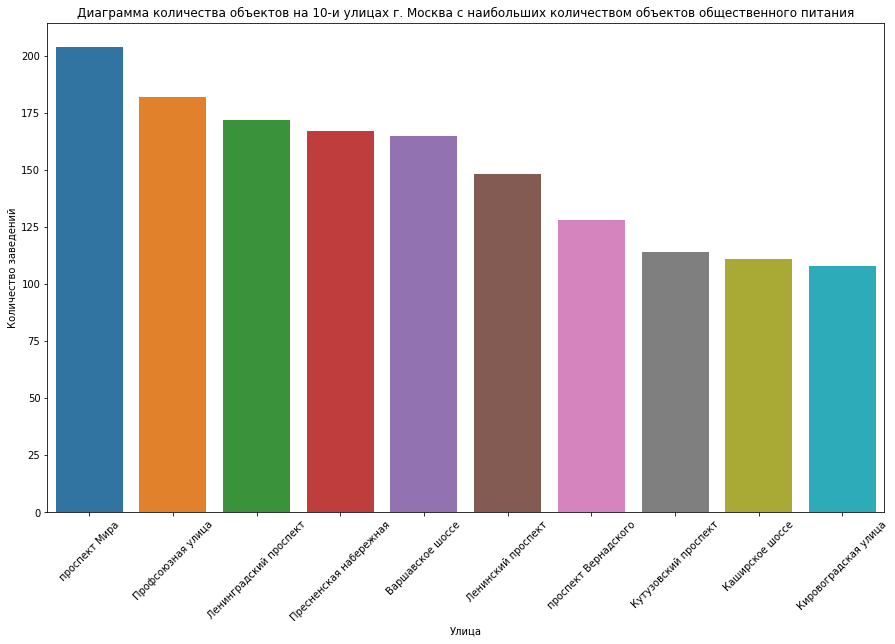

In [30]:
# задаём параметры графика
plt.figure(figsize=(15,9))
plt.xticks(rotation=45)

# строим график
plots = sns.barplot(
    x='street',
    y='id',
    data=streets_top_10,
    ci = None
)

# подписываем график и оси
plots.set_title('Диаграмма количества объектов на 10-и улицах г. Москва с наибольших количеством объектов общественного питания')
plots.set_xlabel('Улица')
plots.set_ylabel('Количество заведений')

plt.show()

Пора определить, в каких районах находятся самые популярные улицы. Для этого загрузим [классификатор улиц](https://data.mos.ru/classifier/7710168515-obshchemoskovskiy-klassifikator-ulits-moskvy-omk-001-2013-razdel-1) и [классификатор территориальных единиц](https://data.mos.ru/classifier/7710168515-obshchemoskovskiy-klassifikator-territorialnyh-edinits-moskvy-omk-002-2013-razdel-1), взятые с официального сайта г. Москва. Сначала с помощью классификатора улиц для каждой улицы будем находить цифровые коды района(ов), а потом из классификатора территориальных единиц добывать название района(ов).

In [31]:
# загружаем классификатор улиц г. Москва
spreadsheet_id = '1fiBAdHtgbccEpp40FDG0vFmBGG1ZlX_ZExEIJVEmY2A'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
streets_clsf = pd.read_csv(BytesIO(r.content))

In [32]:
# загружаем классификатор территориальных единиц г. Москва
spreadsheet_id = '1sdLwAi2IJij87N_J8LHkxNklLkE3xI0jJNnYXZ9yKjA'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts_clsf = pd.read_csv(BytesIO(r.content))

In [33]:
# приводим данные о коде территориальной единицы к строчному типу, т.к. в классификаторе улиц эта информация содержится
# в виде строки
districts_clsf['Kod'] = districts_clsf['Kod'].astype('str')
districts_clsf['Kod'] = districts_clsf['Kod'].apply(lambda x: x if int(x) >= 1000 else '0'+x)

In [34]:
# пишем функцию для вычленения района (районов) для улицы
def find_district(street):
    district_id = list(streets_clsf[streets_clsf['UM_NAMEF'] == street]['UM_TE'])
    if len(district_id) != 0:
        district_id = district_id[0].split(';')
        district = []
        for i in district_id:
            _district = list(districts_clsf[districts_clsf['Kod'] == i]['Name'])[0]
            district.append(_district)
    else:
        district = str(street)
    return district

# применяем функцию к нашему топ-10
streets_top_10['district'] = streets_top_10['street'].apply(find_district)

# посмотрим на результат
display(streets_top_10)

,street,id,district
1449,проспект Мира,204,"[Мещанский район, Алексеевский район, район Ма..."
1038,Профсоюзная улица,182,"[Академический район, район Коньково, Обручевс..."
711,Ленинградский проспект,172,"[район Аэропорт, район Беговой, район Сокол, Х..."
1022,Пресненская набережная,167,[Пресненский район]
424,Варшавское шоссе,165,"[Донской район, район Нагатино-Садовники, Наго..."
714,Ленинский проспект,148,"[район Якиманка, Донской район, Гагаринский ра..."
1445,проспект Вернадского,128,"[Гагаринский район, Ломоносовский район, район..."
701,Кутузовский проспект,114,"[район Дорогомилово, район Фили-Давыдково]"
624,Каширское шоссе,111,"[район Москворечье-Сабурово, район Нагатино-Са..."
631,Кировоградская улица,108,"[район Чертаново Северное, район Чертаново Цен..."


Итак, для каждой из улиц нашего рейтинга мы получили название района (районов) через который(-ые) эта улица проходит. Для 8 из 10 улиц районов несколько и хранятся они у нас в виде списка. Это не совсем удобно для отображения. Сделаем общий список всех районов, через которые проходят улицы из рейтинга и посчитаем, сколько раз каждый район будет отображаться в этом списке. Это будет равнозначно количеству улиц из топ-10, проходящих через район.

In [35]:
# пишем функцию для создания полного списка
def find_all_districts(source):
    temp = []
    for i in source:
        if type(i) == str:
            temp.append(i)
        else:
            temp = temp + i
    return temp

# применяем функцию к датасету
districts = find_all_districts(streets_top_10['district'])

# создаём датафрейм на основе списка
all_districts = pd.DataFrame(districts)

# записываем каждой записи по одному вхождению
all_districts['count'] = 1

# переименовываем столбцы
all_districts.columns=['district', 'count']

# группируем по названию района и считаем вхождения
all_districts = all_districts.groupby('district').agg({'count':'sum'}).sort_values(by='count', ascending=False).reset_index()

# смотрим на результат
display(all_districts)

,district,count
0,район Нагатино-Садовники,2
1,Обручевский район,2
2,район Тропарёво-Никулино,2
3,район Тёплый Стан,2
4,район Чертаново Северное,2
5,район Чертаново Южное,2
6,район Чертаново Центральное,2
7,Ломоносовский район,2
8,Донской район,2
9,Гагаринский район,2


Список есть, теперь на его основе построим график

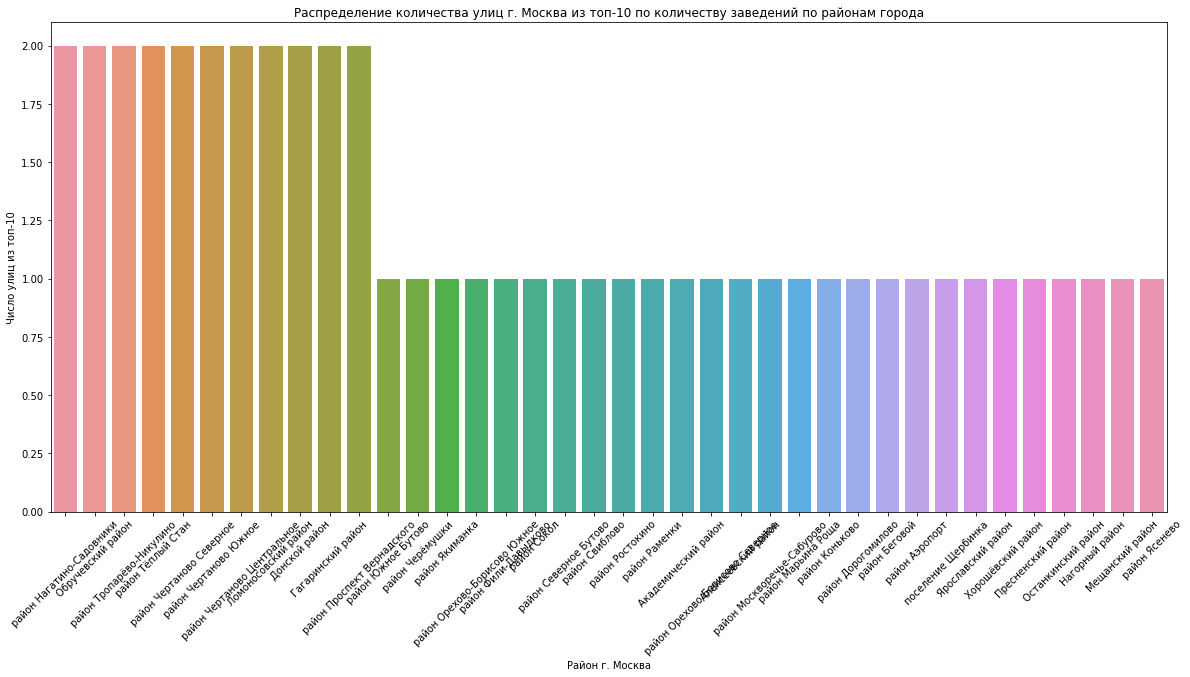

In [36]:
# задаём параметры графика
plt.figure(figsize=(20,9))
plt.xticks(rotation=45)

# строим график
plots = sns.barplot(
    x='district',
    y='count',
    data=all_districts,
    ci = None
)

# подписываем график и оси
plots.set_title('Распределение количества улиц г. Москва из топ-10 по количеству заведений по районам города')
plots.set_xlabel('Район г. Москва')
plots.set_ylabel('Число улиц из топ-10')

plt.show()

Итак, топ-10 улиц проходят через 37 районов, причём через 11 районов проходит по 2 улицы. По результатам исследования мы можем выделить самые популярные районы:

- Нагатино-Садовники
- Обручевский район
- район Тропарёво-Никулино
- район Тёплый Стан
- район Чертаново Северное
- район Чертаново Южное
- район Чертаново Центральное
- Ломоносовский район
- Донской район
- Гагаринский район
- район Проспект Вернадского

### Найдите число улиц с одним объектом общественного питания. Воспользуйтесь внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?

In [37]:
# запишем данные о тех улицах, где есть только 1 объект общественного питания
lonely_streets = data.groupby('street').agg({'id':'count'}).query('id == 1').reset_index()

# выведем на экран число таких улиц
print('В г. Москва {} улиц, на которых находится всего 1 объект общественного питания'.format(len(lonely_streets)))

В г. Москва 569 улиц, на которых находится всего 1 объект общественного питания


In [38]:
# найдём район для каждой улицы
lonely_streets['district'] = lonely_streets['street'].apply(find_district)

# выведем на экран первые 5 записей, чтобы убедиться, что магия сработала
display(lonely_streets.head())

,street,id,district
0,1-й Балтийский переулок,1,[район Аэропорт]
1,1-й Басманный переулок,1,"[Басманный район, Красносельский район]"
2,1-й Ботанический проезд,1,[район Свиблово]
3,1-й Вешняковский проезд,1,[Рязанский район]
4,1-й Голутвинский переулок,1,[район Якиманка]


Район для каждой улицы получили. Составим общий список

In [39]:
# записываем все районы в словарь
districts = find_all_districts(lonely_streets['district'])

#
# создаём датафрейм на основе списка
all_lonely_streets_districts = pd.DataFrame(districts)

# записываем каждой записи по одному вхождению
all_lonely_streets_districts['count'] = 1

# переименовываем столбцы
all_lonely_streets_districts.columns=['district', 'count']

# группируем по названию района и считаем вхождения
all_lonely_streets_districts = all_lonely_streets_districts.groupby('district').agg({'count':'sum'}).sort_values(by='count', ascending=False).reset_index()

# смотрим на результат
display(all_lonely_streets_districts)

,district,count
0,Таганский район,27
1,район Хамовники,26
2,Басманный район,25
3,Тверской район,20
4,Пресненский район,20
...,...,...
124,район Левобережный,1
125,район Лианозово,1
126,район Марфино,1
127,район Марьино,1


In [40]:
# так как число районов довольно значительное, предпочтительнее построить интерактивный график с помощью plotly express
fig = px.bar(
    all_lonely_streets_districts,
    x='district',
    y='count',
    title='Распределение количества улиц г. Москва с 1-м объектом общественного питания по районам города'
)
fig.update_xaxes(tickangle=90)
fig.show()

Итак, что мы видим? Для нескольких улиц район не определён. Изучение внешних данных показывает, что это связано с тем, что данных улиц нет в классификаторе улиц г. Москвы. С учётом того, что таких данных немного, мы можем не обращать внимание на этот факт. Или написать письмо в мерию г. Москва, чтобы обновили классификатор 😊

Также заметно, что улиц, на которых есть всего по 1-му заведению довольно много, и есть некоторые районы, через которые проходит достаточно много таких улиц. Нужно выписать эти районы. Для этого сначала найдём квартили от числа упоминаний районов и выпишем районы, число упоминаний которых входит в 4-й квартиль

In [41]:
display(all_lonely_streets_districts['count'].describe().T)

count    129.000000
mean       4.782946
std        5.288492
min        1.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       27.000000
Name: count, dtype: float64

Итак, нам будут интересны все районы, упоминающиеся более 6 раз. Построим график

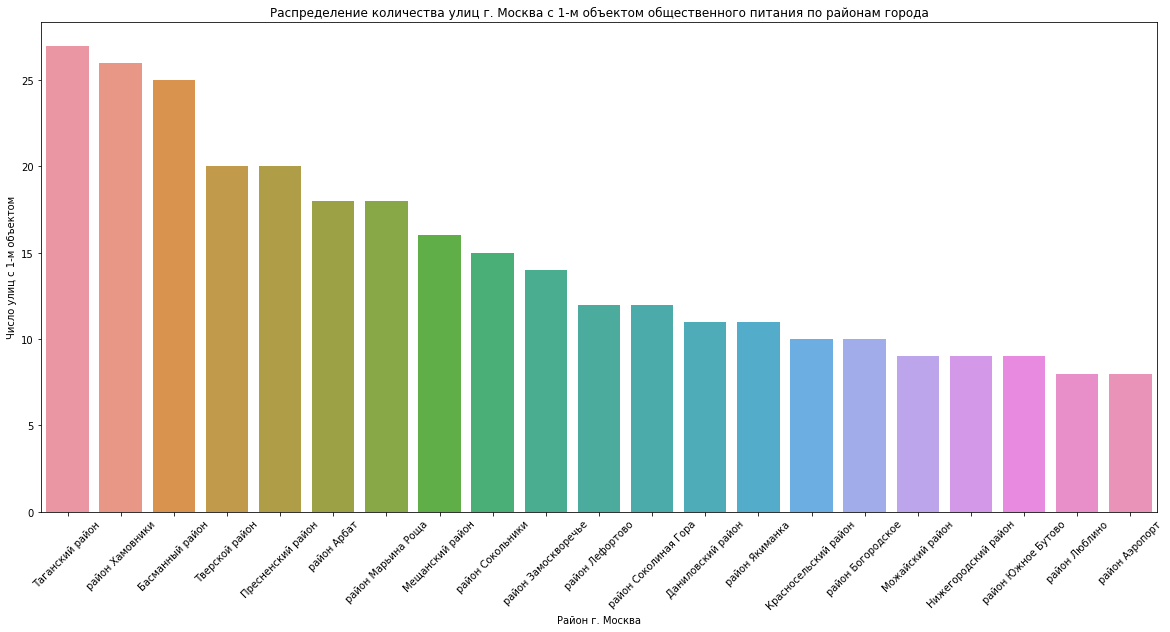

In [42]:
# задаём параметры графика
plt.figure(figsize=(20,9))
plt.xticks(rotation=45)

# строим график
plots = sns.barplot(
    x='district',
    y='count',
    data=all_lonely_streets_districts.query('count > 7'),
    ci = None
)

# подписываем график и оси
plots.set_title('Распределение количества улиц г. Москва с 1-м объектом общественного питания по районам города')
plots.set_xlabel('Район г. Москва')
plots.set_ylabel('Число улиц с 1-м объектом')

plt.show()

Теперь мы знаем все районы с наибольшей концентрацией улиц, на которых есть только 1 объект общественного  питания

### Посмотрите на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания. Какие закономерности можно выявить?

In [43]:
# сохраним информацию о заведениях на самых популярных улицах
top_10 = data[data['street'].isin(streets_top_10['street'])]

In [44]:
# строим график распределения
fig = px.box(top_10, x='street', y='capacity', labels={'street':'Улица', 'capacity':'Число посадочных мест'})
fig.update_layout(
    title_text='Распределение числа посадочных мест для 10-и улиц г. Москва с наибольших количеством объектов общественного питания',
    title_font_size=14
)
fig.show()

Итак, из графика можно сделать следующие выводы:

- Даже на самых популярных улицах количество посадочных мест редко превышает 200
- Медианные значения количества посадочных мест лежат в промежутке от 24 до 47. Т.е. основная часть заведений в нашем топе имеет скромные размеры. Можно предположить, что это связано с тем, что на данных улицах довольно высокая арендная плата, и содержать крупные заведения довольно сложно
- Все улицы из топ-10 (кроме Пресненской набережной и ул. Кировоградской) являются радиальными улицами, т.е. идут от центра к периферии и имеют значительную протяжённость, что и обуславливает количество заведений. На Пресненской набережной расположен Москва-сити, со всеми вытекающими отсюда последствиями. Улица Кировоградская проходит через все три района, в названии которых содержится слово "Чертаново", на ней расположены 7 торговых центров, множество образовательных учреждений, отсюда и членство в топ-10, пусть и на последнем месте

## Общий вывод

- Самые распространённые виды объектов общественного питания - кафе, ресторан, столовая и предприятие быстрого питания
- Всего 19,3% объектов имеют сетевое распространение
- Сетевое распространение характерно для кафе, ресторанов, магазинов кулинарии и предприятий быстрого питания
- Для сетевых заведений характерно иметь большое количество заведений с небольшим (до 100) количеством посадочных мест
- Самое большое количество посадочных мест в среднем предоставляют столовые
- Топ-10 улиц по количеству объектов проходят через 37 районов г. Москва, причём через 7 районов проходят по две улицы из списка
- В г. Москва 569 улиц, на которых расположен всего 1 объект общественного питания. Они проходят через 129 районов города, из которых мы выделили 21, через которые проходит более 6 улиц с таким количеством объектов
- На улицах из списках топ-10 заведения редко имеют более 200 посадочных мест, а медианное количество находится в промежутке от 24 до 47

Исходя из нашего анализа, мы можем дать следующие рекомендации:

- Наше предприятие должно быть одного из 2-х видов: кафе или ресторан. В столовых или предприятие быстрого питания официантов не водится.
- Рекомендуемое количество посадочных мест будет следующим (в зависимости от вида заведения): 100 мест в случае с рестораном или 40 мест в случае с кафе
- По поводу района размещения заведения есть также два варианта:
 - С высоким риском: с учётом специфики нашего заведения, желательно открываться на Пресненской набережной. Там выше конкуренция, но и выше проходимость. Так же там расположены места деловой активности, что в теории должно быть на руку нашему заведению (роботы-официанты 🤖 работают быстрее, не хамят и не требуют чаевых, и, скорее всего, не перепутают ваш заказ)
 - С умеренным риском: выбираем Таганский район, Басманный район или Хамовники - через них проходит наибольшее количество улиц всего с одним объектом общественного питания. Это даст нам более широкое поле для маневра, чем в перенасыщенном центре
- Сетевых заведений в городе меньшинство, поэтому при наличии должного интереса потребителей нет никаких препятствий для развития сети

## Презентация

Презентацию к проекту можно скачать по прямой [ссылке](https://github.com/iskander-filippov/Yandex-Praktikum/blob/main/08_storytelling/Moscow_food_presentation.pdf) или посмотреть на GitHub в [папке с проектом](https://github.com/iskander-filippov/Yandex-Praktikum/blob/main/08_storytelling)